In [78]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [79]:
class point:
    def __init__(self,x,y):
        self.x = x
        self.y = y
    
    def __repr__(self):
        return f'({self.x},{self.y})'
    
    def __lt__(self, other):
        if self.y > other.y:
            return True
        elif self.y == other.y and self.x < other.x:
            return True
        else:
            return False
        
    def __eq__(self, other):
        return (self.x == other.x) & (self.y == other.y)
        
    
class segment:
    def __init__(self, x1, y1, x2, y2):
        self.p1 = point(x1,y1)
        self.p2 = point(x2,y2)
        self.order()
    
    def __repr__(self):
        return f'{self.p1} -> {self.p2}'
    
    def order(self):
        if self.p2 < self.p1:
            aux = self.p1
            self.p1 = self.p2
            self.p2 = aux
    
    def to_array(self):
        return [[self.p1.x,self.p1.y], [self.p2.x,self.p2.y]]
    
    def middle(self, y_new):
        alpha = (y_new - self.p2.y)/(self.p1.y - self.p2.y)
        x_new = alpha*self.p1.x+(1-alpha)*self.p2.x
        return (x_new, y_new)
    
    def __lt__(self, other):
        if isinstance(other, point):
            return middle(other.y) < other
            
        

In [86]:
class Node:
    def __init__(self, val, lc = None, rc = None, y = None, parent = None):
        self.val = val
        self.lc = lc
        self.rc = rc
        self.parent = parent
        if isinstance(self.val, segment):
            self.seg = val
            self.val = val.middle(y)
            
        
def insert(root, new , y = None):
    if isinstance(new, segment):
        test = new.middle(y)
        if root is None:
            return Node(new, y = y)
        elif test < root.val:
            root.lc = insert(root.lc, new, y, parent = root)
        else:
            root.rc = insert(root.rc, new, y, parent = root)
    else:
        if root is None:
            return Node(new)
        elif new < root.val:
            root.lc = insert(root.lc, new, parent = root)
        else:
            root.rc = insert(root.rc, new, parent = root)
        return root

def delete(root, ded): #Modificar, si borrar desde padre o identificar direccion desde hijo
    if root != None:
        if hasattr(root, 'seg'):
            if ded == root.seg:
                if root.rc != None:
                    new_seg, new_val = find_smallest_seg(root.rc)
                    delete(root, new_seg)
                    root.seg = new_seg
                    root.val = new_val
                elif root.lc != None:
                    new_seg = root.lc.seg
                    new_val = root.lc.val
                    root.rc = root.lc.rc
                    root.lc = root.lc.lc
                else:
                    left = False
                    right = False
                    if root.parent.lc.seg = root.seg:
                        left = True
                    elif root.parent.rc.seg = root.seg:
                        right = True
                    root.val = None
                    root.seg = None
            else:
                delete(root.lc, ded)
                delete(root.rc, ded)

def update(root, y):
    root.val = root.seg.middle(y)
            
def find_smallest_seg(root):
    if root.lc == None:
        return root.seg, root.val
    else:
        return find_smallest(root.lc)
        

def inorder(root):
    result = [] 
    if root:
        result.extend(inorder(root.lc))
        if hasattr(root, 'seg'):
            result.append([root.val, root.seg])
        else:
            result.append(root.val)
        result.extend(inorder(root.rc))
    return result

def preorder(root):
    result = [] 
    if root:
        result.append((root.val))
        result.extend(inorder(root.lc))
        result.extend(inorder(root.rc))
    return result

def depth(root):
    if root is None:
        return 0
    return max(depth(root.lc), depth(root.rc)) + 1

def is_balanced(root):
    if root is None:
        return True
    left = depth(root.lc)
    right = depth(root.rc)
    if abs(left - right) < 2 and is_balanced(root.lc) and is_balanced(root.rc):
        return True
    return False

def BBT(x):
    if len(x) == 0:
        return None
    mid = len(x) >> 1
    newRoot = Node(x[mid])
    newRoot.lc = BBT(x[:mid])
    newRoot.rc = BBT(x[mid+1:])
    return newRoot

# def less_line(p0, p1):
#     if p0.y > p1.y:
#         return True
#     elif p0.y == p1.y and p0.x < p1.x:
#         return True
#     else:
#         return False


In [81]:
x = np.random.rand(10,2)
x = x[np.lexsort([x[:,0],-x[:,1]])]

ini = [x]

r = BBT(x)
inorder(r)

[array([0.36800637, 0.99660951]),
 array([0.46455503, 0.73490277]),
 array([0.13612688, 0.62658165]),
 array([0.74067024, 0.58621438]),
 array([0.52578967, 0.42366546]),
 array([0.2961615, 0.4157112]),
 array([0.93448017, 0.27817036]),
 array([0.59714887, 0.20788598]),
 array([0.92222472, 0.19083625]),
 array([0.32218367, 0.09510888])]

In [82]:
def to_segments(x):
    mid = len(x) >> 1
    ini = x[:mid]
    fin = x[mid:]
    return ini, fin

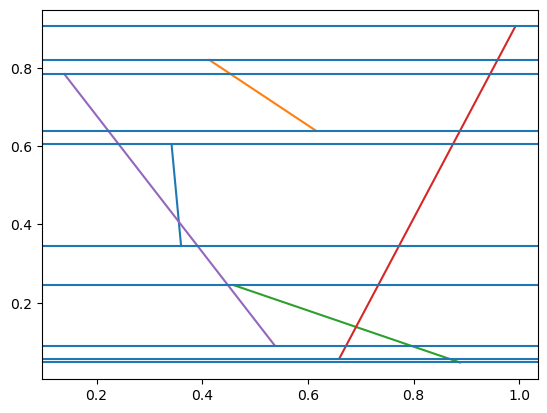

In [83]:
x = np.random.rand(10,2)
ini, fin = to_segments(x)
for i in range(len(ini)):
    plt.plot([ini[i,0], fin[i,0]], [ini[i,1], fin[i,1]])
    
x_ord = x[np.lexsort([x[:,0],-x[:,1]])]
for i in x_ord[:,1]:
    plt.axhline(i)

In [84]:
class sweeper:
    def __init__(self, x):
        self.segs = x
        self.intersections = []
        
        self.ini = []
        self.fin = []
        x_ord = []
        for i in range(len(x)):
            arr = x[i].to_array()
            x_ord.extend(arr)
            self.ini.append([arr[0], self.segs[i]])
            self.fin.append([arr[1], self.segs[i]])
        x_ord = np.array(x_ord)
        x_ord = x_ord[np.lexsort([-x_ord[:,0],x_ord[:,1]])]
        self.events = x_ord.tolist()
        self.tau = None
        self.line = None
        
    def findInter(self, view = True):
        while len(self.events):
            change = True
            aux = self.line
            self.line = self.events.pop()
            self.manipulate_p()
            if view == True:
                if aux:
                    if aux[1] == self.line[1]:
                        change = False
                self.plot(change)
                
    def manipulate_p(self):
        #epsilon = (max([p[0][1] for p in self.ini]) - min([p[0][1] for p in self.fin]))/10000000 #Necesito modificar esto
        #U_p = [[p[1].middle(self.line[1]+epsilon),p[1]] for p in self.ini if p[0] == self.line]
        U_p = [p for p in self.ini if p[0] == self.line]
        L_p = [p for p in self.fin if p[0] == self.line]
        #C_p = [[p[1].middle(self.line[1]+epsilon), p[1]] for p in inorder(self.tau) if p[1].middle(self.line[1]) == self.line]
        print(inorder(self.tau))
        C_p = [p for p in inorder(self.tau) if p[1].middle(self.line[1]) == self.line]
        
        #{tuple(self.line): seg for (p,seg) in inorder(self.tau) if seg.middle(self.line[1]) == self.line}
        if len(U_p)+len(L_p)+len(C_p) > 1:
            self.intersections.append([self.line, U_p, L_p, C_p])

        
        for p in L_p:
            if len(inorder(self.tau)) == 1:
                tau = None
            else:
                delete(self.tau, p[1])
        for p in C_p:
            delete(self.tau, p[1])
        for p in U_p:
            if self.tau == None:
                self.tau = Node(p[1], y=self.line[1])
            else:
                insert(self.tau, p[1], y=self.line[1])
        for p in C_p:
            insert(self.tau, p[1], y=self.line[1])
        #current_segs = [x[1] for x in inorder(self.tau)]
#         temp = U_p
#         temp.extend(C_p)
#         temp.extend([p for p in inorder(self.tau) if (p not in U_p)])
#         temp = sorted(temp, key=lambda pair: (-pair[0][1], pair[0][0]))
#         self.tau = BBT(temp)
        
        #print(len(U_p)+len(C_p))
        #print(U_p)
        #print(C_p)
        #print(self.line)
        if len(U_p)+len(C_p) == 0:
            print('hai')
            #self.find_event()
    
    def plot(self, change=True):
        for p, seg in self.ini:
            plt.plot([seg.p1.x, seg.p2.x], [seg.p1.y, seg.p2.y])
        if self.line and change:
            plt.axhline(self.line[1])

        

[]
[[(0.5717856763640049, 0.809372370442642), (0.5717856763640049,0.809372370442642) -> (0.6604209697559664,0.6540938241339341)]]
[[(0.5717856763640049, 0.809372370442642), (0.5717856763640049,0.809372370442642) -> (0.6604209697559664,0.6540938241339341)], [(0.8359693267854913, 0.7154464190400565), (0.8359693267854913,0.7154464190400565) -> (0.5831820207649616,0.10111180158516753)]]
[[(0.30520117224841414, 0.6579354477919988), (0.30520117224841414,0.6579354477919988) -> (0.2529450251286486,0.49276949421860194)], [(0.5717856763640049, 0.809372370442642), (0.5717856763640049,0.809372370442642) -> (0.6604209697559664,0.6540938241339341)], [(0.8359693267854913, 0.7154464190400565), (0.8359693267854913,0.7154464190400565) -> (0.5831820207649616,0.10111180158516753)]]
hai
[[(0.30520117224841414, 0.6579354477919988), (0.30520117224841414,0.6579354477919988) -> (0.2529450251286486,0.49276949421860194)], [(0.8359693267854913, 0.7154464190400565), (0.8359693267854913,0.7154464190400565) -> (0.58

AttributeError: 'NoneType' object has no attribute 'middle'

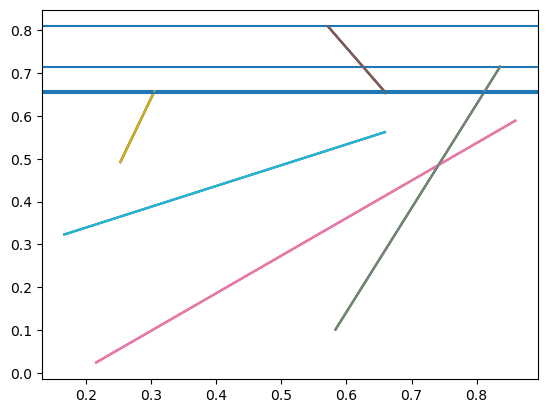

In [85]:
x = np.random.rand(10,2)
ini, fin = to_segments(x)
segmentos = []
for i in range(len(ini)):
    segmentos.append(segment(ini[i][0], ini[i][1], fin[i][0], fin[i][1]))
linea = sweeper(segmentos)
linea.findInter()
#linea = sweeper(x)
#linea.sweep()
#linea.plot()

2

https://bobbyhadz.com/blog/python-check-if-object-has-method#:~:text=This%20is%20a%20three-step%20process%3A%201%20Use%20the,are%20met%2C%20the%20object%20has%20the%20specified%20method.